# Kalman Filtering

In [1]:
import Simulator
import Observation
import Statistics
import KalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_11-14_10_29"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
true_statistics = Statistics.Statistics(simulator, 1)

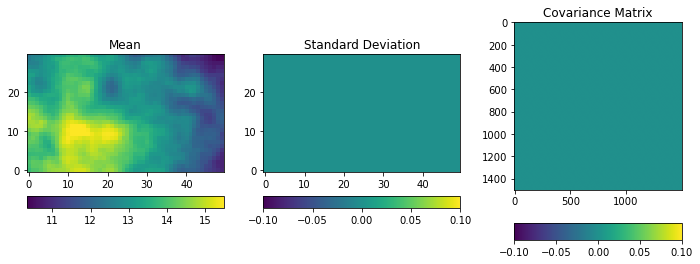

In [4]:
prior_args = Statistics.prior_args_from_file(timestamp)
true_statistics.set_prior(prior_args)

true_statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [5]:
observation = Observation.from_file(grid, timestamp)

Remember to set observation positions and to set/observe values!


In [6]:
import numpy as np
import scipy.stats

In [7]:
trials = 250

coverageKF = np.zeros(grid.N_x)

for s in range(trials):
    print("Experiment ", s)
    
    # Generate new observations of a new truth
    observation.clear_observations()

    true_statistics = Statistics.Statistics(simulator, 1)
    true_statistics.set_prior(prior_args)
    true_statistics.propagate(nt=25)
    truth = true_statistics.mean
    observation.observe(true_statistics.mean)

    # Data assimilation for the new observations
    statistics = Statistics.Statistics(simulator)
    statistics.set_prior(prior_args)
    kalmanFilter = KalmanFilter.Kalman(statistics, observation)

    statistics.propagate(25)
    kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[0])

    coverageKF = coverageKF + np.all([(truth < statistics.mean + 1.64*statistics.stddev), (truth > statistics.mean - 1.64*statistics.stddev)], axis=0)*1/trials

Experiment  0
Please remember to set priors!
Experiment  1
Please remember to set priors!
Experiment  2
Please remember to set priors!
Experiment  3
Please remember to set priors!
Experiment  4
Please remember to set priors!
Experiment  5
Please remember to set priors!
Experiment  6
Please remember to set priors!
Experiment  7
Please remember to set priors!
Experiment  8
Please remember to set priors!
Experiment  9
Please remember to set priors!
Experiment  10
Please remember to set priors!
Experiment  11
Please remember to set priors!
Experiment  12
Please remember to set priors!
Experiment  13
Please remember to set priors!
Experiment  14
Please remember to set priors!
Experiment  15
Please remember to set priors!
Experiment  16
Please remember to set priors!
Experiment  17
Please remember to set priors!
Experiment  18
Please remember to set priors!
Experiment  19
Please remember to set priors!
Experiment  20
Please remember to set priors!
Experiment  21
Please remember to set priors

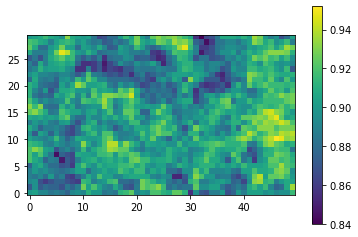

In [8]:
from matplotlib import pyplot as plt
plt.imshow(np.reshape(coverageKF,(grid.ny, grid.nx)), origin="lower")
plt.colorbar()